In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits, load_breast_cancer

np.random.seed(0)

In [2]:
feats, labels = load_breast_cancer(return_X_y=True)
feature_names, target_names = load_breast_cancer().feature_names, str(load_digits().target_names)

In [3]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([212, 357]))

In [4]:
1/(np.log(1800)/np.log(64))

0.5548475499830905

In [5]:
1/(np.log(4)/np.log(2))

0.5

In [6]:
1/(np.log(569)/np.log(30))

0.5361383173878439

In [7]:
np.power(64, 1.8)

1782.8875536304627

In [8]:
print(feats.shape)

num_feats = feats.shape[1]

(569, 30)


In [9]:
k = 5 # k folds parameter
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, cross_validate, learning_curve
X_train, X_test, y_train, y_test = train_test_split(feats, labels, test_size=0.2, random_state=0, stratify=labels)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
def validation_curve_plots(train_scores, test_scores, classifier_type, param_name, param_range, semilog=False):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Validation Curve with " + classifier_type)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    #plt.ylim(0.0, 1.1)
    lw = 2
    if not semilog:
        plt.plot(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
    else:
        plt.semilogx(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    if not semilog:
        plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
    else:
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

def cross_validation_describe(scores):
    n_leaves = [estimator.get_n_leaves() for estimator in scores['estimator']]
    depths = [estimator.get_depth() for estimator in scores['estimator']]
    print('Median leaf count: ' + str(np.median(n_leaves)))
    print('Median depth: ' + str(np.median(depths)))
    print('Median train score: ' + str(np.mean(scores['train_score'])))
    print('Mean validation score: ' + str(np.mean(scores['test_score'])))
    print('Delta: ' + str(np.mean(scores['train_score'])-np.mean(scores['test_score'])))
    print('Mean fit time: ' + str(np.mean(scores['fit_time'])))
    print('Mean score time: ' + str(np.mean(scores['score_time'])))
    
def learning_curve_plots(train_sizes, train_scores, valid_scores, classifier_type, semilog=False):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    plt.title("Learning Curve with " + classifier_type)
    plt.xlabel('Training Examples')
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    if not semilog:
        plt.plot(train_sizes, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
    else:
        plt.semilogx(train_sizes, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    if not semilog:
        plt.plot(train_sizes, valid_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
    else:
        plt.semilogx(train_sizes, valid_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    
    
def iteration_curve_plots(train_scores, test_scores, classifier_type, param_name, param_range, semilog=False):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Iterative Training Curve with " + classifier_type)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    #plt.ylim(0.0, 1.1)
    lw = 2
    if not semilog:
        plt.plot(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
    else:
        plt.semilogx(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    if not semilog:
        plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
    else:
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    

### Tree

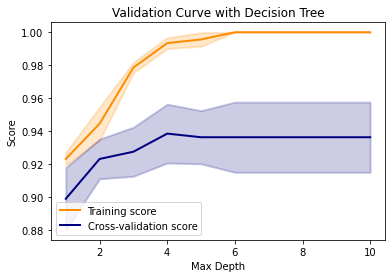

Median leaf count: 8.0
Median depth: 3.0
Median train score: 0.9785714285714284
Mean validation score: 0.9274725274725274
Delta: 0.05109890109890103
Mean fit time: 0.003168010711669922
Mean score time: 0.000313568115234375

Median leaf count: 13.0
Median depth: 4.0
Median train score: 0.9934065934065934
Mean validation score: 0.9384615384615385
Delta: 0.05494505494505497
Mean fit time: 0.003258037567138672
Mean score time: 0.00022840499877929688

Median leaf count: 14.0
Median depth: 5.0
Median train score: 0.9956043956043956
Mean validation score: 0.9362637362637363
Delta: 0.05934065934065935
Mean fit time: 0.0033166885375976564
Mean score time: 0.000217437744140625


In [11]:
from sklearn import tree
import graphviz
depth_range = np.linspace(1,10,10, dtype=int)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(class_weight='balanced', random_state=0), X=X_train, y=y_train, param_name='max_depth',
                                              param_range=depth_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'Max Depth', depth_range)

depth_best = 3
depth_opt_tree = tree.DecisionTreeClassifier(class_weight='balanced', max_depth=depth_best, random_state=0)
#ccp_opt_tree.fit(X_train, y_train)
#ccp_graph = tree.export_graphviz(ccp_opt_tree, out_file=None, feature_names=feature_names, class_names = target_names)
#graph = graphviz.Source(ccp_graph)
#graph.render("ccp")
depth_opt_scores = cross_validate(depth_opt_tree, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)

cross_validation_describe(depth_opt_scores)

print()

depth_best = 4
depth_opt_tree = tree.DecisionTreeClassifier(class_weight='balanced', max_depth=depth_best, random_state=0)
#ccp_opt_tree.fit(X_train, y_train)
#ccp_graph = tree.export_graphviz(ccp_opt_tree, out_file=None, feature_names=feature_names, class_names = target_names)
#graph = graphviz.Source(ccp_graph)
#graph.render("ccp")
depth_opt_scores = cross_validate(depth_opt_tree, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)
cross_validation_describe(depth_opt_scores)

print()

depth_best = 5
depth_opt_tree = tree.DecisionTreeClassifier(class_weight='balanced', max_depth=depth_best, random_state=0)
#ccp_opt_tree.fit(X_train, y_train)
#ccp_graph = tree.export_graphviz(ccp_opt_tree, out_file=None, feature_names=feature_names, class_names = target_names)
#graph = graphviz.Source(ccp_graph)
#graph.render("ccp")
depth_opt_scores = cross_validate(depth_opt_tree, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)

cross_validation_describe(depth_opt_scores)
    

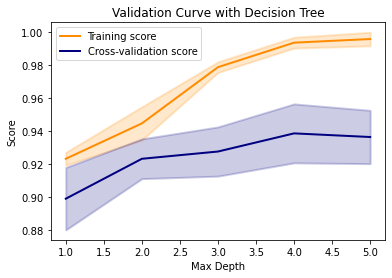

[[0.91208791 0.92307692 0.9010989  0.86813187 0.89010989]
 [0.92307692 0.92307692 0.91208791 0.91208791 0.94505495]
 [0.92307692 0.94505495 0.91208791 0.91208791 0.94505495]
 [0.91208791 0.95604396 0.92307692 0.94505495 0.95604396]
 [0.91208791 0.94505495 0.92307692 0.94505495 0.95604396]]
[0.8989011  0.92307692 0.92747253 0.93846154 0.93626374]
[0.01890621 0.01203786 0.01490622 0.01785503 0.01615048]
Depth 1, Depth 2, Same pop with >95% confidence
1, 2, True
1, 3, False
1, 4, False
1, 5, False
2, 3, True
2, 4, True
2, 5, True
3, 4, True
3, 5, True
4, 5, True


In [12]:
from scipy.stats import ttest_ind
depth_range = np.linspace(1,5,5, dtype=int)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(class_weight='balanced', random_state=0), X=X_train, y=y_train, param_name='max_depth',
                                              param_range=depth_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'Max Depth', depth_range)

print(valid_scores)
mean_scores = np.mean(valid_scores, axis=1)
print(mean_scores)
std_scores = np.std(valid_scores, axis=1)
print(std_scores)

print('Depth 1, Depth 2, Same pop with >95% confidence')
for i in range(4):
    a = valid_scores[i]
    for j in range(i+1, 5):
        b=valid_scores[j]
        stat, p = ttest_ind(a, b, equal_var=False)
        print(str(i+1)+', ' + str(j+1) + ', ' + str(p>0.05))
        
        

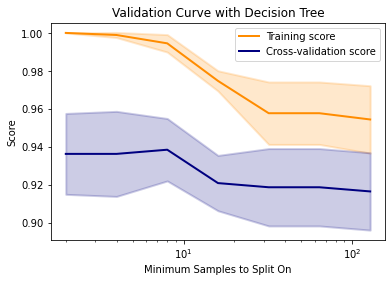

In [13]:
min_samples_split_range = [2, 4, 8, 16, 32, 64, 128]

train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(class_weight='balanced', random_state=0), X=X_train, y=y_train, param_name='min_samples_split',
                                              param_range=min_samples_split_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'Minimum Samples to Split On', min_samples_split_range, semilog=True)

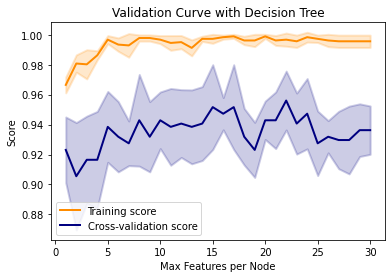

In [14]:
max_features_range=np.linspace(1, num_feats, num_feats, dtype=int)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0), X=X_train, y=y_train, param_name='max_features',
                                              param_range=max_features_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'Max Features per Node', max_features_range)

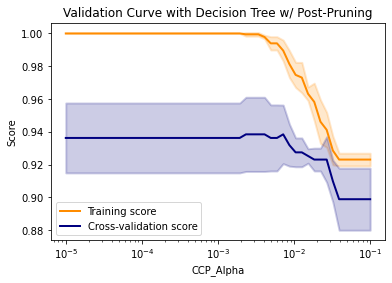

In [15]:
ccp_range = np.logspace(-5, -1)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(class_weight='balanced', random_state=0), X=X_train, y=y_train, param_name='ccp_alpha',
                                              param_range=ccp_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree w/ Post-Pruning', 'CCP_Alpha', ccp_range, semilog=True)

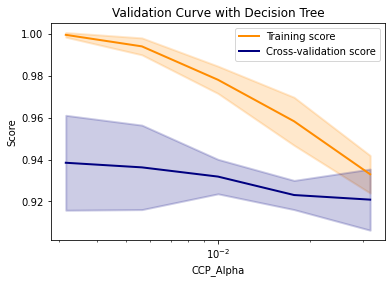

In [16]:
ccp_range = [10**-2.5, 10**-2.25, 10**-2, 10**-1.75, 10**-1.5]
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(class_weight='balanced', random_state=0), X=X_train, y=y_train, param_name='ccp_alpha',
                                              param_range=ccp_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'CCP_Alpha', ccp_range, semilog=True)

In [17]:
print('CCP_1, CCP_2, Same pop with >95% confidence')
for i in range(4):
    a = valid_scores[i]
    for j in range(i+1, 5):
        b=valid_scores[j]
        stat, p = ttest_ind(a, b, equal_var=False)
        print(str(ccp_range[i])+', ' + str(ccp_range[j]) + ', ' + str(p>0.05))

CCP_1, CCP_2, Same pop with >95% confidence
0.0031622776601683794, 0.005623413251903491, True
0.0031622776601683794, 0.01, True
0.0031622776601683794, 0.01778279410038923, True
0.0031622776601683794, 0.03162277660168379, True
0.005623413251903491, 0.01, True
0.005623413251903491, 0.01778279410038923, True
0.005623413251903491, 0.03162277660168379, True
0.01, 0.01778279410038923, True
0.01, 0.03162277660168379, True
0.01778279410038923, 0.03162277660168379, True


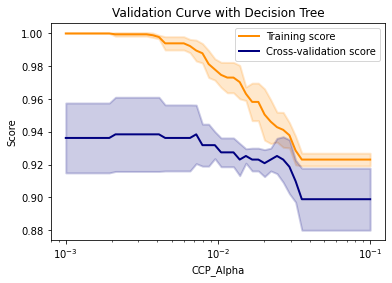

In [18]:
ccp_range = np.logspace(-3, -1)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(class_weight='balanced', random_state=0), X=X_train, y=y_train, param_name='ccp_alpha',
                                              param_range=ccp_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'CCP_Alpha', ccp_range, semilog=True)

In [19]:
ccp_best = [10**-2.5, 10**-2.25, 10**-2, 10**-1.75, 10**-1.5]
for ccp in ccp_best:
    print('Complexity param: ' + str(ccp))
    ccp_opt_tree = tree.DecisionTreeClassifier(class_weight='balanced', ccp_alpha=ccp, random_state=0)
    ccp_opt_scores = cross_validate(ccp_opt_tree, X_train, y_train, cv=5, return_train_score=True, return_estimator=True)
    cross_validation_describe(ccp_opt_scores)
    print()
    



Complexity param: 0.0031622776601683794
Median leaf count: 13.0
Median depth: 6.0
Median train score: 0.9994505494505495
Mean validation score: 0.9384615384615385
Delta: 0.060989010989010994
Mean fit time: 0.0035683155059814454
Mean score time: 0.0002193450927734375

Complexity param: 0.005623413251903491
Median leaf count: 10.0
Median depth: 4.0
Median train score: 0.993956043956044
Mean validation score: 0.9362637362637363
Delta: 0.05769230769230771
Mean fit time: 0.003441905975341797
Mean score time: 0.000211334228515625

Complexity param: 0.01
Median leaf count: 7.0
Median depth: 4.0
Median train score: 0.9780219780219779
Mean validation score: 0.9318681318681319
Delta: 0.04615384615384599
Mean fit time: 0.003452301025390625
Mean score time: 0.0002124786376953125

Complexity param: 0.01778279410038923
Median leaf count: 5.0
Median depth: 3.0
Median train score: 0.9582417582417582
Mean validation score: 0.9230769230769231
Delta: 0.03516483516483504
Mean fit time: 0.00335993766784667

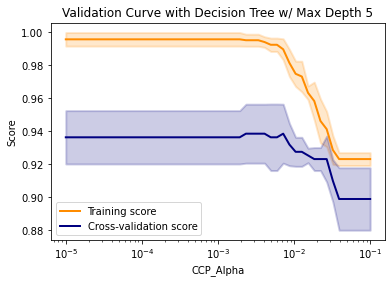

In [20]:
ccp_range = np.logspace(-5, -1)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0), X=X_train, y=y_train, param_name='ccp_alpha',
                                              param_range=ccp_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree w/ Max Depth 5', 'CCP_Alpha', ccp_range, semilog=True)

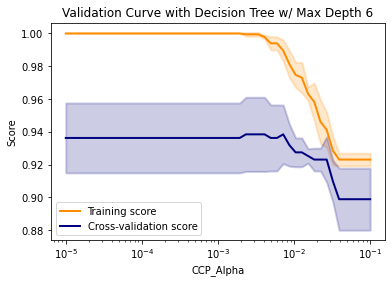

In [21]:
ccp_range = np.logspace(-5, -1)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=0), X=X_train, y=y_train, param_name='ccp_alpha',
                                              param_range=ccp_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree w/ Max Depth 6', 'CCP_Alpha', ccp_range, semilog=True)

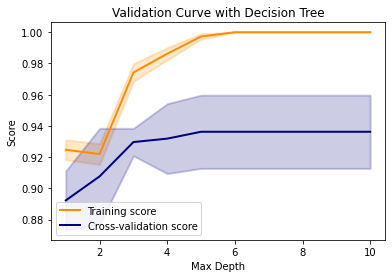

In [22]:
depth_range = np.linspace(1,10,10)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy', random_state=0), X=X_train, y=y_train, param_name='max_depth',
                                              param_range=depth_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'Max Depth', depth_range)

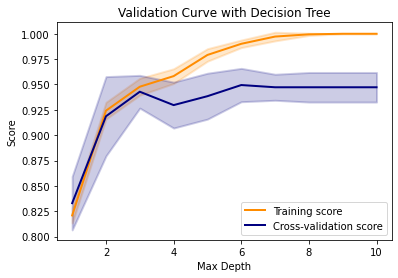

In [23]:
depth_range = np.linspace(1,10,10)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(class_weight='balanced', splitter='random', random_state=0), X=X_train, y=y_train, param_name='max_depth',
                                              param_range=depth_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'Max Depth', depth_range)

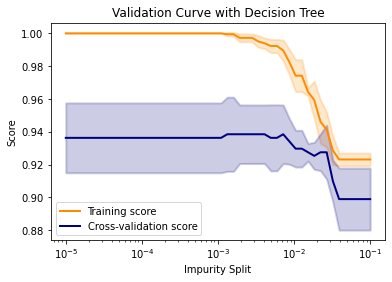

In [24]:
min_inpurity_decrease_range = np.logspace(-5,-1)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=0), X=X_train, y=y_train, param_name='min_impurity_decrease',
                                              param_range=min_inpurity_decrease_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'Impurity Split', min_inpurity_decrease_range, semilog=True)

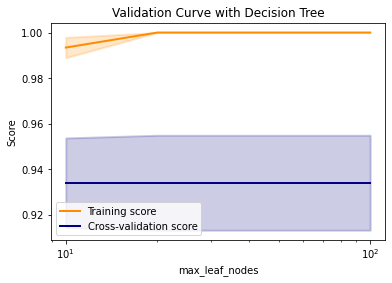

In [25]:
node_range = np.linspace(10,100,10, dtype=int)
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(class_weight='balanced', random_state=0), X=X_train, y=y_train, param_name='max_leaf_nodes',
                                              param_range=node_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Decision Tree', 'max_leaf_nodes', node_range, semilog=True)

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 45 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


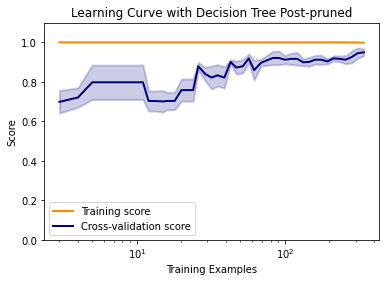

In [26]:
train_samples = np.logspace(-2, 0)*len(y_train) * 0.75
train_samples = train_samples.astype(int)

train_sizes, train_scores, valid_scores = learning_curve(tree.DecisionTreeClassifier(class_weight='balanced', ccp_alpha=10**-2.5, random_state=0), X_train, y_train, train_sizes=train_samples, cv=5)
learning_curve_plots(train_sizes, train_scores, valid_scores, 'Decision Tree Post-pruned', semilog=True)

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 45 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


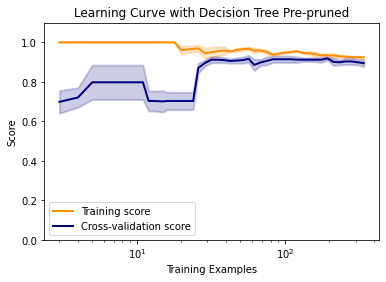

In [27]:
train_sizes, train_scores, valid_scores = learning_curve(tree.DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=0), X_train, y_train, train_sizes=train_samples, cv=5)
learning_curve_plots(train_sizes, train_scores, valid_scores, 'Decision Tree Pre-pruned', semilog=True)

In [28]:
import time
final_tree = tree.DecisionTreeClassifier(max_depth=1, class_weight='balanced', random_state=0)
final_tree.fit(X_train, y_train)
print(final_tree.score(X_test, y_test))

n_iters = 100

start = time.time()
for i in range(n_iters):
    final_tree.fit(X_train, y_train)
end = time.time()
print('fit time: ' + str((end-start)/n_iters))

start = time.time()
for i in range(n_iters):
    final_tree.score(X_test, y_test)
end = time.time()
print('inference time: ' + str((end-start)/n_iters))

0.8947368421052632
fit time: 0.001525886058807373
inference time: 0.00018582820892333983


### NN

In [29]:
from keras import models
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.wrappers.scikit_learn import KerasClassifier

early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5)

In [30]:
from sklearn.utils import class_weight
#https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

In [31]:
def create_network(num_neurons = 16, second_layer=True, lr=0.01):
    network = models.Sequential()
    network.add(layers.Dense(units=num_neurons, activation='relu', input_shape=(num_feats,)))
    if second_layer:
        network.add(layers.Dense(units=num_neurons, activation='relu'))
    network.add(layers.Dense(units=2, activation='softmax'))
    network.compile(loss='categorical_crossentropy', # Cross-entropy
                        optimizer=optimizers.SGD(learning_rate=lr), # Root Mean Square Propagation
                        metrics=['accuracy']) # Accuracy performance metric
    return network

def create_single_layer_network(lr=0.01):
    network = models.Sequential()
    network.add(layers.Dense(units=2, activation='softmax', input_shape=(num_feats,)))
    network.compile(loss='categorical_crossentropy', # Cross-entropy
                        optimizer=optimizers.SGD(learning_rate=lr), # Root Mean Square Propagation
                        metrics=['accuracy']) # Accuracy performance metric
    return network



In [32]:
class_weight_dict = {}
for i in range(len(class_weights)):
    class_weight_dict[i] = class_weights[i]
class_weight_dict

{0: 1.338235294117647, 1: 0.7982456140350878}

2021-09-26 11:24:54.440247: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-26 11:24:54.440408: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-26 11:24:54.440997: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2021-09-26 11:24:54.496274: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-26 11:24:54.516099: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


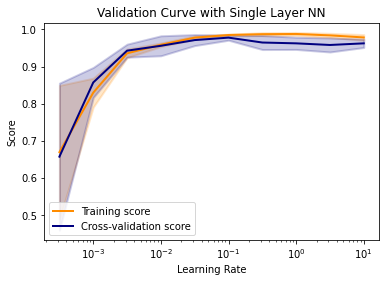

In [33]:
lr_range = np.logspace(-3.5,1, 10)
train_scores, valid_scores = validation_curve(estimator=KerasClassifier(build_fn=create_single_layer_network, epochs=50, batch_size=64, verbose=0), X=X_train, y=y_train, param_name='lr',
                                              param_range=lr_range, cv=5, fit_params={'callbacks':early_stopping, 'class_weight':class_weight_dict})
validation_curve_plots(train_scores, valid_scores, 'Single Layer NN', 'Learning Rate', lr_range, semilog=True)

In [34]:
print(np.max(np.mean(valid_scores, axis=1)))

0.9780219793319702


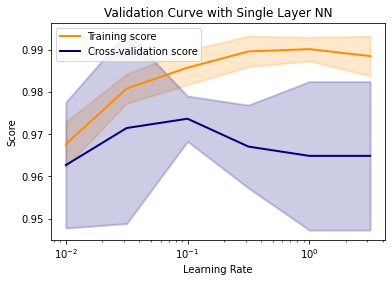

[array([0.95604396, 0.95604396, 0.98901099, 0.96703297, 0.94505495]), array([0.97802198, 0.94505495, 0.98901099, 1.        , 0.94505495]), array([0.97802198, 0.96703297, 0.97802198, 0.96703297, 0.97802198]), array([0.96703297, 0.95604396, 0.97802198, 0.95604396, 0.97802198]), array([0.94505495, 0.96703297, 0.98901099, 0.94505495, 0.97802198]), array([0.94505495, 0.97802198, 0.98901099, 0.94505495, 0.96703297])]
[0.96263736 0.97142857 0.97362638 0.96703297 0.96483517 0.96483517]


In [35]:
lr_range=np.logspace(-2,0.5,6)
train_scores, valid_scores = validation_curve(estimator=KerasClassifier(build_fn=create_single_layer_network, epochs=50, batch_size=64, verbose=0), X=X_train, y=y_train, param_name='lr',
                                              param_range=lr_range, cv=5, fit_params={'callbacks':early_stopping})
validation_curve_plots(train_scores, valid_scores, 'Single Layer NN', 'Learning Rate', lr_range, semilog=True)
name_list = ['Single 10^-2', 'Single 10^-1.5', 'Single 10^-1', 'Single 10^-0.5', 'Single 10^0', 'Single 10^0.5']
valid_list = []
for i in range(6):
    valid_list.append(valid_scores[i, :])
print(valid_list)
print(np.mean(valid_scores, axis=1))

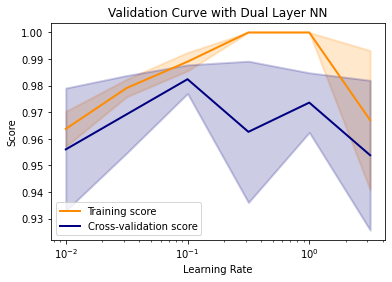

[array([0.95604396, 0.95604396, 0.98901099, 0.96703297, 0.94505495]), array([0.97802198, 0.94505495, 0.98901099, 1.        , 0.94505495]), array([0.97802198, 0.96703297, 0.97802198, 0.96703297, 0.97802198]), array([0.96703297, 0.95604396, 0.97802198, 0.95604396, 0.97802198]), array([0.94505495, 0.96703297, 0.98901099, 0.94505495, 0.97802198]), array([0.94505495, 0.97802198, 0.98901099, 0.94505495, 0.96703297]), array([0.93406594, 0.96703297, 0.97802198, 0.97802198, 0.92307693]), array([0.97802198, 0.94505495, 0.98901099, 0.96703297, 0.96703297]), array([0.97802198, 0.97802198, 0.98901099, 0.98901099, 0.97802198]), array([0.96703297, 0.96703297, 0.98901099, 0.91208792, 0.97802198]), array([0.95604396, 0.96703297, 0.98901099, 0.97802198, 0.97802198]), array([0.91208792, 0.95604396, 0.93406594, 0.98901099, 0.97802198])]
[0.95604396 0.96923077 0.98241758 0.96263736 0.97362638 0.95384616]


In [36]:
lr_range=np.logspace(-2,0.5,6)
train_scores, valid_scores = validation_curve(estimator=KerasClassifier(build_fn=create_network, epochs=50, batch_size=64, verbose=0, second_layer=False), X=X_train, y=y_train, param_name='lr',
                                              param_range=lr_range, cv=5, fit_params={'callbacks':early_stopping, 'class_weight':class_weight_dict})
validation_curve_plots(train_scores, valid_scores, 'Dual Layer NN', 'Learning Rate', lr_range, semilog=True)
name_list.extend(['Dual 10^-2', 'Dual 10^-1.5', 'Dual 10^-1', 'Dual 10^-0.5', 'Dual 10^0', 'Dual 10^0.5'])
for i in range(6):
    valid_list.append(valid_scores[i, :])
print(valid_list)
print(np.mean(valid_scores, axis=1))

In [37]:
print('Network 1, Network 2, Same pop with >95% confidence')
print(name_list)
for i in range(len(valid_list)-1):
    a = valid_list[i]
    for j in range(i+1, len(valid_list)):
        b=valid_list[j]
        stat, p = ttest_ind(a, b, equal_var=False)
        print(name_list[i]+', ' + name_list[j] + ', ' + str(p>0.05))

Network 1, Network 2, Same pop with >95% confidence
['Single 10^-2', 'Single 10^-1.5', 'Single 10^-1', 'Single 10^-0.5', 'Single 10^0', 'Single 10^0.5', 'Dual 10^-2', 'Dual 10^-1.5', 'Dual 10^-1', 'Dual 10^-0.5', 'Dual 10^0', 'Dual 10^0.5']
Single 10^-2, Single 10^-1.5, True
Single 10^-2, Single 10^-1, True
Single 10^-2, Single 10^-0.5, True
Single 10^-2, Single 10^0, True
Single 10^-2, Single 10^0.5, True
Single 10^-2, Dual 10^-2, True
Single 10^-2, Dual 10^-1.5, True
Single 10^-2, Dual 10^-1, True
Single 10^-2, Dual 10^-0.5, True
Single 10^-2, Dual 10^0, True
Single 10^-2, Dual 10^0.5, True
Single 10^-1.5, Single 10^-1, True
Single 10^-1.5, Single 10^-0.5, True
Single 10^-1.5, Single 10^0, True
Single 10^-1.5, Single 10^0.5, True
Single 10^-1.5, Dual 10^-2, True
Single 10^-1.5, Dual 10^-1.5, True
Single 10^-1.5, Dual 10^-1, True
Single 10^-1.5, Dual 10^-0.5, True
Single 10^-1.5, Dual 10^0, True
Single 10^-1.5, Dual 10^0.5, True
Single 10^-1, Single 10^-0.5, True
Single 10^-1, Single 

In [38]:
print(np.max(np.mean(valid_scores, axis=1)))

0.9824175834655762


/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 46 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


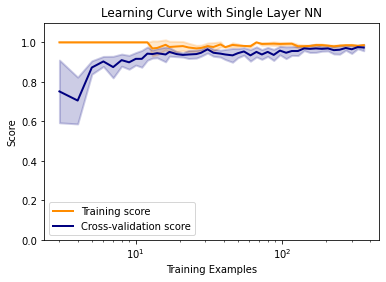

In [39]:
train_samples = np.logspace(-2, 0)*len(y_train) * 0.8
train_samples = train_samples.astype(int)

train_sizes, train_scores, valid_scores = learning_curve(KerasClassifier(build_fn=create_single_layer_network, epochs=50, batch_size=64, verbose=0, lr=0.1) , X_train, y_train, train_sizes=train_samples, cv=5, fit_params={'callbacks':early_stopping, 'class_weight':class_weight_dict})
learning_curve_plots(train_sizes, train_scores, valid_scores, 'Single Layer NN', semilog=True)

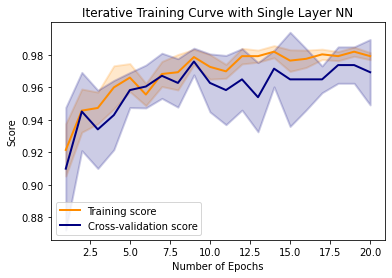

In [40]:
epochs_range=np.linspace(1,20,20, dtype=int)
train_scores, valid_scores = validation_curve(estimator=KerasClassifier(build_fn=create_single_layer_network, epochs=50, batch_size=64, verbose=0, lr=0.1), X=X_train, y=y_train, param_name='epochs',
                                              param_range=epochs_range, cv=5, fit_params={'callbacks':early_stopping, 'class_weight':class_weight_dict})
iteration_curve_plots(train_scores, valid_scores, 'Single Layer NN', 'Number of Epochs', epochs_range)

In [41]:
final_clf_nn = KerasClassifier(build_fn=create_single_layer_network, epochs=50, batch_size=64, verbose=0, lr = 0.1)
final_clf_nn.fit(X_train, y_train, callbacks=early_stopping)
score = final_clf_nn.score(X_test, y_test)
print(score)

start = time.time()
for i in range(n_iters):
    final_clf_nn.fit(X_train, y_train, callbacks=early_stopping)
end = time.time()
print('fit time: ' + str((end-start)/n_iters))

start = time.time()
for i in range(n_iters):
    final_clf_nn.score(X_test, y_test)
end = time.time()
print('inference time: ' + str((end-start)/n_iters))


0.9736841917037964
fit time: 1.4587042832374573
inference time: 0.20166009187698364


### Boosted Trees

In [42]:
from sklearn.ensemble import AdaBoostClassifier

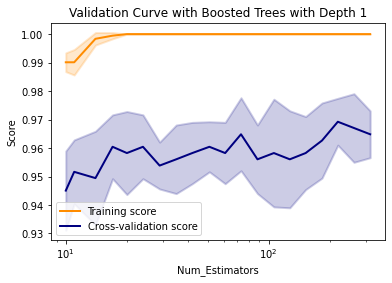

In [43]:
estimators_range=np.logspace(1,2.5,20, dtype=int)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(class_weight='balanced', max_depth=1)), X=X_train, y=y_train, param_name='n_estimators',
                                              param_range=estimators_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees with Depth 1', 'Num_Estimators', estimators_range, semilog=True)

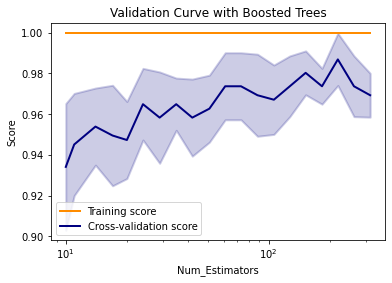

In [44]:
estimators_range=np.logspace(1,2.5,20, dtype=int)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(class_weight='balanced', max_depth=2)), X=X_train, y=y_train, param_name='n_estimators',
                                              param_range=estimators_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees', 'Num_Estimators', estimators_range, semilog=True)

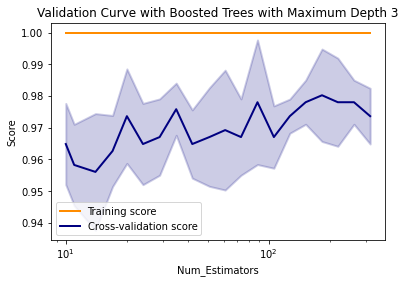

In [45]:
estimators_range=np.logspace(1,2.5,20, dtype=int)
train_scores, valid_scores = validation_curve(estimator=AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(class_weight='balanced', max_depth=3)), X=X_train, y=y_train, param_name='n_estimators',
                                              param_range=estimators_range, cv=5)
validation_curve_plots(train_scores, valid_scores, 'Boosted Trees with Maximum Depth 3', 'Num_Estimators', estimators_range, semilog=True)

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 46 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


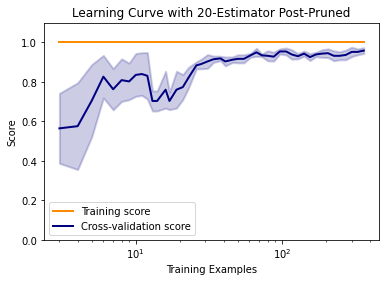

In [46]:
train_sizes, train_scores, valid_scores = learning_curve(AdaBoostClassifier(tree.DecisionTreeClassifier(class_weight='balanced', max_depth=1), n_estimators=20) , X_train, y_train, train_sizes=train_samples, cv=5)
learning_curve_plots(train_sizes, train_scores, valid_scores, '20-Estimator Post-Pruned', semilog=True)

In [47]:
final_clf_boosted = AdaBoostClassifier(tree.DecisionTreeClassifier(class_weight='balanced', max_depth=1), n_estimators=20)
final_clf_boosted.fit(X_train, y_train)
score = final_clf_boosted.score(X_test, y_test)
print(score)

start = time.time()
for i in range(n_iters):
    final_clf_boosted.fit(X_train, y_train)
end = time.time()
print('fit time: ' + str((end-start)/n_iters))

start = time.time()
for i in range(n_iters):
    final_clf_boosted.score(X_test, y_test)
end = time.time()
print('inference time: ' + str((end-start)/n_iters))


0.9298245614035088
fit time: 0.08240516424179077
inference time: 0.00379410982131958


### Support Vector Machines

In [48]:
from sklearn import svm

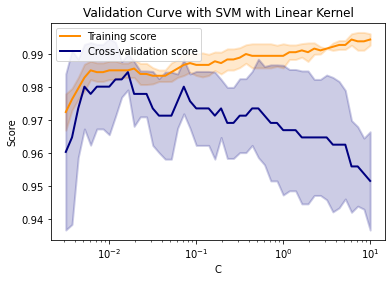

In [49]:
#classifier = svm.SVC(kernel='linear', )

C_range = np.logspace(-2.5,1)
train_scores, valid_scores = validation_curve(estimator=svm.SVC(class_weight='balanced', kernel='linear'), X=X_train, y=y_train, param_name='C',
                                              param_range=C_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'SVM with Linear Kernel', 'C', C_range, semilog=True)

In [50]:
print(np.max(np.mean(valid_scores, axis=1)))

0.9846153846153847


In [51]:
print(C_range)
print(np.mean(valid_scores, axis=1))

c_max = C_range[np.argmax(np.mean(valid_scores, axis=1))]

print(np.max(np.mean(valid_scores, axis=1)))

[3.16227766e-03 3.72759372e-03 4.39397056e-03 5.17947468e-03
 6.10540230e-03 7.19685673e-03 8.48342898e-03 1.00000000e-02
 1.17876863e-02 1.38949549e-02 1.63789371e-02 1.93069773e-02
 2.27584593e-02 2.68269580e-02 3.16227766e-02 3.72759372e-02
 4.39397056e-02 5.17947468e-02 6.10540230e-02 7.19685673e-02
 8.48342898e-02 1.00000000e-01 1.17876863e-01 1.38949549e-01
 1.63789371e-01 1.93069773e-01 2.27584593e-01 2.68269580e-01
 3.16227766e-01 3.72759372e-01 4.39397056e-01 5.17947468e-01
 6.10540230e-01 7.19685673e-01 8.48342898e-01 1.00000000e+00
 1.17876863e+00 1.38949549e+00 1.63789371e+00 1.93069773e+00
 2.27584593e+00 2.68269580e+00 3.16227766e+00 3.72759372e+00
 4.39397056e+00 5.17947468e+00 6.10540230e+00 7.19685673e+00
 8.48342898e+00 1.00000000e+01]
[0.96043956 0.96483516 0.97362637 0.98021978 0.97802198 0.98021978
 0.98021978 0.98021978 0.98241758 0.98241758 0.98461538 0.97802198
 0.97802198 0.97802198 0.97362637 0.97142857 0.97142857 0.97142857
 0.97582418 0.98021978 0.97582418 0

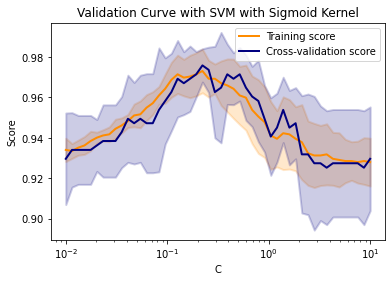

In [52]:
#classifier = svm.SVC(kernel='linear', )

C_range = np.logspace(-2,1)
train_scores, valid_scores = validation_curve(estimator=svm.SVC(class_weight='balanced', kernel='sigmoid'), X=X_train, y=y_train, param_name='C',
                                              param_range=C_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'SVM with Sigmoid Kernel', 'C', C_range, semilog=True)

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=4).  Cons

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=7).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=8).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Con

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=42).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=43).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=44).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=45).  

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=41).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=42).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=43).  

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=17).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=18).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=19).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=20).  

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


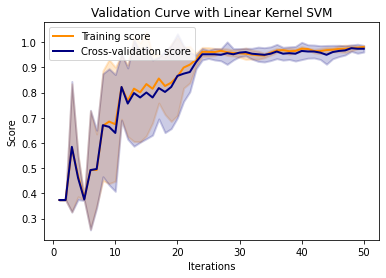

In [53]:
max_iter_range = np.linspace(1,50,50)
train_scores, valid_scores = validation_curve(estimator=svm.SVC(class_weight='balanced', kernel='linear', C=c_max), X=X_train, y=y_train, param_name='max_iter',
                                              param_range=max_iter_range, cv=5)

validation_curve_plots(train_scores, valid_scores, 'Linear Kernel SVM', 'Iterations', max_iter_range)

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 46 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/svm/_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "/home/christian/anaconda3/envs/ml_intel/lib/

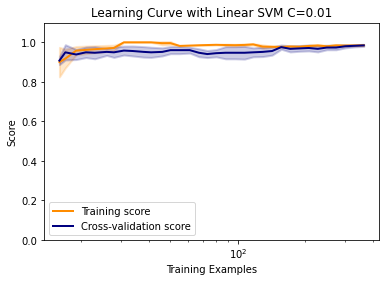

In [54]:
train_sizes, train_scores, valid_scores = learning_curve(svm.SVC(class_weight='balanced', kernel='linear', C=c_max) , X_train, y_train, train_sizes=train_samples, cv=5)
learning_curve_plots(train_sizes, train_scores, valid_scores, 'Linear SVM C=0.01', semilog=True)

In [55]:
final_clf_svm = svm.SVC(class_weight='balanced', kernel='linear', C=c_max)
final_clf_svm.fit(X_train, y_train)
score = final_clf_svm.score(X_test, y_test)
print(score)

start = time.time()
for i in range(n_iters):
    final_clf_svm.fit(X_train, y_train)
end = time.time()
print('fit time: ' + str((end-start)/n_iters))

start = time.time()
for i in range(n_iters):
    final_clf_svm.score(X_test, y_test)
end = time.time()
print('inference time: ' + str((end-start)/n_iters))


0.9736842105263158
fit time: 0.0024080872535705566
inference time: 0.0011712336540222168


### KNN

In [56]:
from sklearn import neighbors

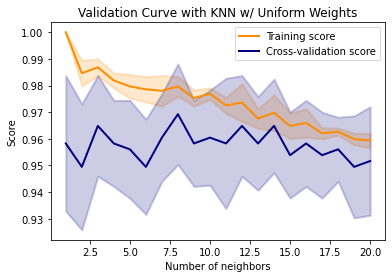

In [57]:
n_neighbors = np.linspace(1,20,20, dtype=int)

train_scores, valid_scores = validation_curve(estimator=neighbors.KNeighborsClassifier(weights='uniform'), X=X_train, y=y_train, param_name='n_neighbors',
                                              param_range=n_neighbors, cv=5)

validation_curve_plots(train_scores, valid_scores, 'KNN w/ Uniform Weights', 'Number of neighbors', n_neighbors)

In [58]:
print(n_neighbors)
print(np.mean(valid_scores, axis=1))

n_max = n_neighbors[np.argmax(np.mean(valid_scores, axis=1))]
print(n_max)

print(np.max(np.mean(valid_scores, axis=1)))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[0.95824176 0.94945055 0.96483516 0.95824176 0.95604396 0.94945055
 0.96043956 0.96923077 0.95824176 0.96043956 0.95824176 0.96483516
 0.95824176 0.96483516 0.95384615 0.95824176 0.95384615 0.95604396
 0.94945055 0.95164835]
8
0.9692307692307691


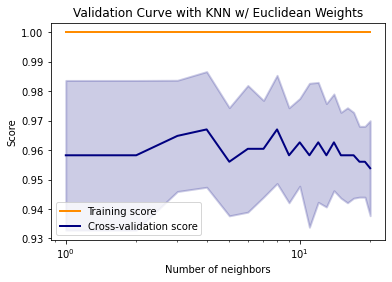

In [59]:
n_neighbors = np.linspace(1,20,20, dtype=int)

train_scores, valid_scores = validation_curve(estimator=neighbors.KNeighborsClassifier(weights='distance'), X=X_train, y=y_train, param_name='n_neighbors',
                                              param_range=n_neighbors, cv=5)

validation_curve_plots(train_scores, valid_scores, 'KNN w/ Euclidean Weights', 'Number of neighbors', n_neighbors, semilog=True)

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 46 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "
/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/christian/anaconda3/envs/ml_

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 197, in predict
    neigh_dist, neigh_ind = self.kneighbors(

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 197, in predict
    neigh_dist, neigh_ind = self.kneighbors(

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 197, in predict
    neigh_dist, neigh_ind = self.kneighbors(

/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/christian/anaconda3/envs/ml_intel/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 197, in predict
    neigh_dist, neigh_ind = self.kneighbors(

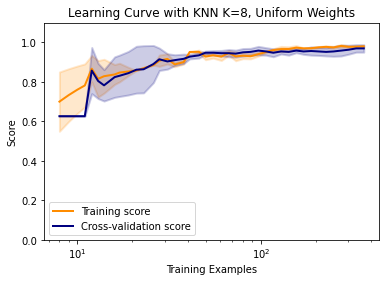

In [60]:
train_sizes, train_scores, valid_scores = learning_curve(neighbors.KNeighborsClassifier(n_neighbors=8, weights='uniform') , X_train, y_train, train_sizes=train_samples, cv=5)
learning_curve_plots(train_sizes, train_scores, valid_scores, 'KNN K=8, Uniform Weights', semilog=True)

In [61]:
final_clf_knn = neighbors.KNeighborsClassifier(n_neighbors=8, weights='uniform')
final_clf_knn.fit(X_train, y_train)
score = final_clf_knn.score(X_test, y_test)
print(score)

start = time.time()
for i in range(n_iters):
    final_clf_knn.fit(X_train, y_train)
end = time.time()
print('fit time: ' + str((end-start)/n_iters))

start = time.time()
for i in range(n_iters):
    final_clf_knn.score(X_test, y_test)
end = time.time()
print('inference time: ' + str((end-start)/n_iters))


0.9649122807017544
fit time: 0.0001852703094482422
inference time: 0.007321493625640869
